In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np
import pickle
import pylab as pl
import pandas as pd

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)


<IPython.core.display.Javascript object>

In [2]:
# time.sleep(90)

In [3]:
# regions = [ 'us-west1-b', 'us-west1-b', 'us-west1-b']
# regions = [ 'us-west1-b']


instance_type = 'e2-small'

In [4]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 1, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 1, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 2, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 2, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 2, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 2, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 3, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 3, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 3, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 3, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 17, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 18, 'us-west1-b', 1, -1, 'FKA.pem', 2, -1,
# 19, 'us-west1-b', 1, -1, 'FKA.pem', 3, -1,
# 20, 'us-west1-b', 0, 4, 'FKE.pem', -1, 16,
# 21, 'us-west1-b', 0, 4, 'FKE.pem', -1, 17,
# 22, 'us-west1-b', 0, 4, 'FKE.pem', -1, 18,
# 23, 'us-west1-b', 0, 4, 'FKE.pem', -1, 19,
# 24, 'us-west1-b', 0, 5, 'FKE.pem', -1, 20,
# 25, 'us-west1-b', 0, 5, 'FKE.pem', -1, 21,
# 26, 'us-west1-b', 0, 5, 'FKE.pem', -1, 22,
# 27, 'us-west1-b', 0, 5, 'FKE.pem', -1, 23,
# 28, 'us-west1-b', 0, 6, 'FKE.pem', -1, 24,
# 29, 'us-west1-b', 0, 6, 'FKE.pem', -1, 25,
# 30, 'us-west1-b', 0, 6, 'FKE.pem', -1, 26,
# 31, 'us-west1-b', 0, 6, 'FKE.pem', -1, 27,
# 32, 'us-west1-b', 0, 7, 'FKE.pem', -1, 28,
# 33, 'us-west1-b', 0, 7, 'FKE.pem', -1, 29,
# 34, 'us-west1-b', 0, 7, 'FKE.pem', -1, 30,
# 35, 'us-west1-b', 0, 7, 'FKE.pem', -1, 31,
# 36, 'us-west1-b', 1, -1, 'FKE.pem', 4, -1,
# 37, 'us-west1-b', 1, -1, 'FKE.pem', 5, -1,
# 38, 'us-west1-b', 1, -1, 'FKE.pem', 6, -1,
# 39, 'us-west1-b', 1, -1, 'FKE.pem', 7, -1,
# 40, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 32,
# 41, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 33,
# 42, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 34,
# 43, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 35,
# 44, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 36,
# 45, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 37,
# 46, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 38,
# 47, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 39,
# 48, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 40,
# 49, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 41,
# 50, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 42,
# 51, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 43,
# 52, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 44,
# 53, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 45,
# 54, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 46,
# 55, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 47,
# 56, 'us-west1-b', 1, -1, 'FKU2.pem', 8, -1,
# 57, 'us-west1-b', 1, -1, 'FKU2.pem', 9, -1,
# 58, 'us-west1-b', 1, -1, 'FKU2.pem', 10, -1,
# 59, 'us-west1-b', 1, -1, 'FKU2.pem', 11, -1,

In [5]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 1, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 1, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 2, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 2, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 2, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 2, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 3, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 3, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 3, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 3, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 17, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 18, 'us-west1-b', 1, -1, 'FKA.pem', 2, -1,
# 19, 'us-west1-b', 1, -1, 'FKA.pem', 3, -1,
# 20, 'europe-west3-c', 0, 4, 'FKE.pem', -1, 16,
# 21, 'europe-west3-c', 0, 4, 'FKE.pem', -1, 17,
# 22, 'europe-west3-c', 0, 4, 'FKE.pem', -1, 18,
# 23, 'europe-west3-c', 0, 4, 'FKE.pem', -1, 19,
# 24, 'europe-west3-c', 0, 5, 'FKE.pem', -1, 20,
# 25, 'europe-west3-c', 0, 5, 'FKE.pem', -1, 21,
# 26, 'europe-west3-c', 0, 5, 'FKE.pem', -1, 22,
# 27, 'europe-west3-c', 0, 5, 'FKE.pem', -1, 23,
# 28, 'europe-west3-c', 0, 6, 'FKE.pem', -1, 24,
# 29, 'europe-west3-c', 0, 6, 'FKE.pem', -1, 25,
# 30, 'europe-west3-c', 0, 6, 'FKE.pem', -1, 26,
# 31, 'europe-west3-c', 0, 6, 'FKE.pem', -1, 27,
# 32, 'europe-west3-c', 0, 7, 'FKE.pem', -1, 28,
# 33, 'europe-west3-c', 0, 7, 'FKE.pem', -1, 29,
# 34, 'europe-west3-c', 0, 7, 'FKE.pem', -1, 30,
# 35, 'europe-west3-c', 0, 7, 'FKE.pem', -1, 31,
# 36, 'europe-west3-c', 1, -1, 'FKE.pem', 4, -1,
# 37, 'europe-west3-c', 1, -1, 'FKE.pem', 5, -1,
# 38, 'europe-west3-c', 1, -1, 'FKE.pem', 6, -1,
# 39, 'europe-west3-c', 1, -1, 'FKE.pem', 7, -1,
# 40, 'asia-south1-c', 0, 8, 'FKU2.pem', -1, 32,
# 41, 'asia-south1-c', 0, 8, 'FKU2.pem', -1, 33,
# 42, 'asia-south1-c', 0, 8, 'FKU2.pem', -1, 34,
# 43, 'asia-south1-c', 0, 8, 'FKU2.pem', -1, 35,
# 44, 'asia-south1-c', 0, 9, 'FKU2.pem', -1, 36,
# 45, 'asia-south1-c', 0, 9, 'FKU2.pem', -1, 37,
# 46, 'asia-south1-c', 0, 9, 'FKU2.pem', -1, 38,
# 47, 'asia-south1-c', 0, 9, 'FKU2.pem', -1, 39,
# 48, 'asia-south1-c', 0, 10, 'FKU2.pem', -1, 40,
# 49, 'asia-south1-c', 0, 10, 'FKU2.pem', -1, 41,
# 50, 'asia-south1-c', 0, 10, 'FKU2.pem', -1, 42,
# 51, 'asia-south1-c', 0, 10, 'FKU2.pem', -1, 43,
# 52, 'asia-south1-c', 0, 11, 'FKU2.pem', -1, 44,
# 53, 'asia-south1-c', 0, 11, 'FKU2.pem', -1, 45,
# 54, 'asia-south1-c', 0, 11, 'FKU2.pem', -1, 46,
# 55, 'asia-south1-c', 0, 11, 'FKU2.pem', -1, 47,
# 56, 'asia-south1-c', 1, -1, 'FKU2.pem', 8, -1,
# 57, 'asia-south1-c', 1, -1, 'FKU2.pem', 9, -1,
# 58, 'asia-south1-c', 1, -1, 'FKU2.pem', 10, -1,
# 59, 'asia-south1-c', 1, -1, 'FKU2.pem', 11, -1,

In [6]:
# 2 clusters

In [7]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 0,'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 0,'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 0,'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 0,'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 25, 'asia-south1-c', 0, 1,'FKA.pem', -1, 24,
# 26, 'asia-south1-c', 0, 1,'FKA.pem', -1, 25,
# 27, 'asia-south1-c', 0, 1,'FKA.pem', -1, 26,
# 28, 'asia-south1-c', 0, 1,'FKA.pem', -1, 27,
# 29, 'asia-south1-c', 0, 1,'FKA.pem', -1, 28,
# 30, 'asia-south1-c', 0, 1,'FKA.pem', -1, 29,
# 31, 'asia-south1-c', 0, 1,'FKA.pem', -1, 30,
# 32, 'asia-south1-c', 0, 1,'FKA.pem', -1, 31,
# 33, 'asia-south1-c', 0, 1,'FKA.pem', -1, 32,
# 34, 'asia-south1-c', 0, 1,'FKA.pem', -1, 33,
# 35, 'asia-south1-c', 0, 1,'FKA.pem', -1, 34,
# 36, 'asia-south1-c', 0, 1,'FKA.pem', -1, 35,
# 37, 'asia-south1-c', 0, 1,'FKA.pem', -1, 36,
# 38, 'asia-south1-c', 0, 1,'FKA.pem', -1, 37,
# 39, 'asia-south1-c', 0, 1,'FKA.pem', -1, 38,
# 40, 'asia-south1-c', 0, 1,'FKA.pem', -1, 39,
# 41, 'asia-south1-c', 0, 1,'FKA.pem', -1, 40,
# 42, 'asia-south1-c', 0, 1,'FKA.pem', -1, 41,
# 43, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 42,
# 44, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 43,
# 45, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 44,
# 46, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 45,
# 47, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 46,
# 48, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 47,
# 49, 'asia-south1-c', 1, -1, 'FKA.pem', 1, -1,


In [8]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 0, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 0, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 0, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 0, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 0, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 0, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 0, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 0, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 0, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 0, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 0, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 0, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 0, 0, 'FKA.pem', -1, 16,
# 17, 'us-west1-b', 0, 0, 'FKA.pem', -1, 17,
# 18, 'us-west1-b', 0, 0, 'FKA.pem', -1, 18,
# 19, 'us-west1-b', 0, 0, 'FKA.pem', -1, 19,
# 20, 'us-west1-b', 0, 0,'FKA.pem', -1, 20,
# 21, 'us-west1-b', 0, 0,'FKA.pem', -1, 21,
# 22, 'us-west1-b', 0, 0,'FKA.pem', -1, 22,
# 23, 'us-west1-b', 0, 0,'FKA.pem', -1, 23,
# 24, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 25, 'us-west1-b', 0, 1,'FKA.pem', -1, 24,
# 26, 'us-west1-b', 0, 1,'FKA.pem', -1, 25,
# 27, 'us-west1-b', 0, 1,'FKA.pem', -1, 26,
# 28, 'us-west1-b', 0, 1,'FKA.pem', -1, 27,
# 29, 'us-west1-b', 0, 1,'FKA.pem', -1, 28,
# 30, 'us-west1-b', 0, 1,'FKA.pem', -1, 29,
# 31, 'us-west1-b', 0, 1,'FKA.pem', -1, 30,
# 32, 'us-west1-b', 0, 1,'FKA.pem', -1, 31,
# 33, 'us-west1-b', 0, 1,'FKA.pem', -1, 32,
# 34, 'us-west1-b', 0, 1,'FKA.pem', -1, 33,
# 35, 'us-west1-b', 0, 1,'FKA.pem', -1, 34,
# 36, 'us-west1-b', 0, 1,'FKA.pem', -1, 35,
# 37, 'us-west1-b', 0, 1,'FKA.pem', -1, 36,
# 38, 'us-west1-b', 0, 1,'FKA.pem', -1, 37,
# 39, 'us-west1-b', 0, 1,'FKA.pem', -1, 38,
# 40, 'us-west1-b', 0, 1,'FKA.pem', -1, 39,
# 41, 'us-west1-b', 0, 1,'FKA.pem', -1, 40,
# 42, 'us-west1-b', 0, 1,'FKA.pem', -1, 41,
# 43, 'us-west1-b', 0, 1, 'FKA.pem', -1, 42,
# 44, 'us-west1-b', 0, 1, 'FKA.pem', -1, 43,
# 45, 'us-west1-b', 0, 1, 'FKA.pem', -1, 44,
# 46, 'us-west1-b', 0, 1, 'FKA.pem', -1, 45,
# 47, 'us-west1-b', 0, 1, 'FKA.pem', -1, 46,
# 48, 'us-west1-b', 0, 1, 'FKA.pem', -1, 47,
# 49, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,


In [9]:
# 3 clusters

In [10]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 0, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 0, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 0, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 0, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 0, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 0, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 0, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 0, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 0, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 0, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 0, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 0, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 17, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 16,
# 18, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 17,
# 19, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 18,
# 20, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 19,
# 21, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 20,
# 22, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 21,
# 23, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 22,
# 24, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 23,
# 25, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 24,
# 26, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 25,
# 27, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 26,
# 28, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 27,
# 29, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 28,
# 30, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 29,
# 31, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 30,
# 32, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 31,
# 33, 'europe-west3-c', 1, -1, 'FKE.pem', 1, -1,
# 34, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 32,
# 35, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 33,
# 36, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 34,
# 37, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 35,
# 38, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 36,
# 39, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 37,
# 40, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 38,
# 41, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 39,
# 42, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 40,
# 43, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 41,
# 44, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 42,
# 45, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 43,
# 46, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 44,
# 47, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 45,
# 48, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 46,
# 49, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 47,
# 50, 'asia-south1-c', 1, -1, 'FKU2.pem', 2, -1,

In [11]:
# 3 cluster test non-geo

In [12]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 5, 'us-west1-b', 0, 1, 'FKE.pem', -1, 4,
# 6, 'us-west1-b', 0, 1, 'FKE.pem', -1, 5,
# 7, 'us-west1-b', 0, 1, 'FKE.pem', -1, 6,
# 8, 'us-west1-b', 0, 1, 'FKE.pem', -1, 7,
# 9, 'us-west1-b', 1, -1, 'FKE.pem', 1, -1,
# 10, 'us-west1-b', 0, 2, 'FKU2.pem', -1, 8,
# 11, 'us-west1-b', 0, 2, 'FKU2.pem', -1, 9,
# 12, 'us-west1-b', 0, 2, 'FKU2.pem', -1, 10,
# 13, 'us-west1-b', 0, 2, 'FKU2.pem', -1, 11,
# 14, 'us-west1-b', 1, -1, 'FKU2.pem', 2, -1,

In [13]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 1, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 1, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 2, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 2, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 2, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 2, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 3, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 3, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 3, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 3, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKU2.pem', 0, -1,
# 17, 'us-west1-b', 1, -1, 'FKU2.pem', 1, -1,
# 18, 'us-west1-b', 1, -1, 'FKU2.pem', 2, -1,
# 19, 'us-west1-b', 1, -1, 'FKU2.pem', 3, -1,

In [14]:
# 2 clusters

In [15]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,

# 4, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,

# 25, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 24,
# 26, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 25,
# 27, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 26,
# 28, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 27,


# 49, 'asia-south1-c', 1, -1, 'FKU2.pem', 1, -1,

In [16]:
# 6 clusters

In [17]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 0, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 0, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 0, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 0, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 1, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 1, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 1, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 1, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 1, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 1, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 1, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 1, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 17, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 18, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 16,
# 19, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 17,
# 20, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 18,
# 21, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 19,
# 22, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 20,
# 23, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 21,
# 24, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 22,
# 25, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 23,
# 26, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 24,
# 27, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 25,
# 28, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 26,
# 29, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 27,
# 30, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 28,
# 31, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 29,
# 32, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 30,
# 33, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 31,
# 34, 'europe-west3-c', 1, -1, 'FKE.pem', 2, -1,
# 35, 'europe-west3-c', 1, -1, 'FKE.pem', 3, -1,
# 36, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 32,
# 37, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 33,
# 38, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 34,
# 39, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 35,
# 40, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 36,
# 41, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 37,
# 42, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 38,
# 43, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 39,
# 44, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 40,
# 45, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 41,
# 46, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 42,
# 47, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 43,
# 48, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 44,
# 49, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 45,
# 50, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 46,
# 51, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 47,
# 52, 'asia-south1-c', 1, -1, 'FKU2.pem', 4, -1,
# 53, 'asia-south1-c', 1, -1, 'FKU2.pem', 5, -1,

In [18]:
# 8 clusters

In [19]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 0, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 0, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 1, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 1, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 1, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 1, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 2, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 2, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 2, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 2, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 0, 2, 'FKA.pem', -1, 16,
# 17, 'us-west1-b', 0, 2, 'FKA.pem', -1, 17,
# 18, 'us-west1-b', 0, 3, 'FKA.pem', -1, 18,
# 19, 'us-west1-b', 0, 3, 'FKA.pem', -1, 19,
# 20, 'us-west1-b', 0, 3,'FKA.pem', -1, 20,
# 21, 'us-west1-b', 0, 3,'FKA.pem', -1, 21,
# 22, 'us-west1-b', 0, 3,'FKA.pem', -1, 22,
# 23, 'us-west1-b', 0, 3,'FKA.pem', -1, 23,
# 24, 'us-west1-b', 0, 4,'FKA.pem', -1, 24,
# 25, 'us-west1-b', 0, 4,'FKA.pem', -1, 25,
# 26, 'us-west1-b', 0, 4,'FKA.pem', -1, 26,
# 27, 'us-west1-b', 0, 4,'FKA.pem', -1, 27,
# 28, 'us-west1-b', 0, 4,'FKA.pem', -1, 28,
# 29, 'us-west1-b', 0, 4,'FKA.pem', -1, 29,
# 30, 'us-west1-b', 0, 5,'FKA.pem', -1, 30,
# 31, 'us-west1-b', 0, 5,'FKA.pem', -1, 31,
# 32, 'us-west1-b', 0, 5,'FKA.pem', -1, 32,
# 33, 'us-west1-b', 0, 5,'FKA.pem', -1, 33,
# 34, 'us-west1-b', 0, 5,'FKA.pem', -1, 34,
# 35, 'us-west1-b', 0, 5,'FKA.pem', -1, 35,
# 36, 'us-west1-b', 0, 6,'FKA.pem', -1, 36,
# 37, 'us-west1-b', 0, 6,'FKA.pem', -1, 37,
# 38, 'us-west1-b', 0, 6,'FKA.pem', -1, 38,
# 39, 'us-west1-b', 0, 6,'FKA.pem', -1, 39,
# 40, 'us-west1-b', 0, 6,'FKA.pem', -1, 40,
# 41, 'us-west1-b', 0, 6,'FKA.pem', -1, 41,
# 42, 'us-west1-b', 0, 7, 'FKA.pem', -1, 42,
# 43, 'us-west1-b', 0, 7, 'FKA.pem', -1, 43,
# 44, 'us-west1-b', 0, 7, 'FKA.pem', -1, 44,
# 45, 'us-west1-b', 0, 7, 'FKA.pem', -1, 45,
# 46, 'us-west1-b', 0, 7, 'FKA.pem', -1, 46,
# 47, 'us-west1-b', 0, 7, 'FKA.pem', -1, 47,
# 48, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 49, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 50, 'us-west1-b', 1, -1, 'FKA.pem', 2, -1,
# 51, 'us-west1-b', 1, -1, 'FKA.pem', 3, -1,
# 52, 'us-west1-b', 1, -1, 'FKA.pem', 4, -1,
# 53, 'us-west1-b', 1, -1, 'FKA.pem', 5, -1,
# 54, 'us-west1-b', 1, -1, 'FKA.pem', 6, -1,
# 55, 'us-west1-b', 1, -1, 'FKA.pem', 7, -1,

In [20]:
df =pd.read_csv('node_info.csv')

node_info_dict = df.to_dict()

node_info_dict

{'node_id': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9},
 'region': {0: " 'europe-west3-c'",
  1: " 'europe-west3-c'",
  2: " 'europe-west3-c'",
  3: " 'europe-west3-c'",
  4: " 'europe-west3-c'",
  5: " 'asia-south1-c'",
  6: " 'asia-south1-c'",
  7: " 'asia-south1-c'",
  8: " 'asia-south1-c'",
  9: " 'asia-south1-c'"},
 'ServerOrClientregion': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 1,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 1},
 'cluster_id': {0: 0, 1: 0, 2: 0, 3: 0, 4: -1, 5: 1, 6: 1, 7: 1, 8: 1, 9: -1},
 'key_file': {0: " 'FKA.pem'",
  1: " 'FKA.pem'",
  2: " 'FKA.pem'",
  3: " 'FKA.pem'",
  4: " 'FKA.pem'",
  5: "'FKA.pem'",
  6: "'FKA.pem'",
  7: "'FKA.pem'",
  8: "'FKA.pem'",
  9: " 'FKA.pem'"},
 'clientID': {0: -1,
  1: -1,
  2: -1,
  3: -1,
  4: 0,
  5: -1,
  6: -1,
  7: -1,
  8: -1,
  9: 1},
 'ServerID': {0: 0, 1: 1, 2: 2, 3: 3, 4: -1, 5: 4, 6: 5, 7: 6, 8: 7, 9: -1},
 ' PublicIp': {0: nan,
  1: nan,
  2: nan,
  3: nan,
  4: nan,
  5: nan,
  6: nan,
  7: nan,
  8: n

In [21]:
f = open('all_external_ips', "r")
data1 = [line.strip() for line in f.readlines()]

data1 = [x for x in data1 if x!='None']

In [22]:
f = open('all_internal_ips', "r")
data2 = [line.strip() for line in f.readlines()]

data2 = [x for x in data2 if x!='None']

In [23]:
data2, len(data2)

(['10.156.0.56',
  '10.156.0.54',
  '10.156.0.57',
  '10.156.0.55',
  '10.156.0.58',
  '10.160.0.15',
  '10.160.0.59',
  '10.160.0.18',
  '10.160.0.6',
  '10.160.0.65'],
 10)

In [24]:
data = []

skip_instances = 0
    
for i in range(skip_instances, len(data1)):
    if data1[i]!='None':
        data.append(data1[i] + '    ' + data2[i])

In [25]:
data, len(data)

(['10.156.0.56    10.156.0.56',
  '10.156.0.54    10.156.0.54',
  '10.156.0.57    10.156.0.57',
  '10.156.0.55    10.156.0.55',
  '10.156.0.58    10.156.0.58',
  '10.160.0.15    10.160.0.15',
  '10.160.0.59    10.160.0.59',
  '10.160.0.18    10.160.0.18',
  '10.160.0.6    10.160.0.6',
  '10.160.0.65    10.160.0.65'],
 10)

In [26]:
for index, item in enumerate(data1):
    if 'publicIP' not in node_info_dict.keys():
        node_info_dict['publicIP'] = {}

        
    node_info_dict['publicIP'][index] = item 
    
    
for index, item in enumerate(data2):
    if 'privateIP' not in node_info_dict.keys():
        node_info_dict['privateIP'] = {}
        
    node_info_dict['privateIP'][index] = item 
    
    
    
for index, item in enumerate(data):
    if 'publicAndprivateIP' not in node_info_dict.keys():
        node_info_dict['publicAndprivateIP'] = {}
        
    node_info_dict['publicAndprivateIP'][index] = item 

In [27]:
node_info_dict

{'node_id': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9},
 'region': {0: " 'europe-west3-c'",
  1: " 'europe-west3-c'",
  2: " 'europe-west3-c'",
  3: " 'europe-west3-c'",
  4: " 'europe-west3-c'",
  5: " 'asia-south1-c'",
  6: " 'asia-south1-c'",
  7: " 'asia-south1-c'",
  8: " 'asia-south1-c'",
  9: " 'asia-south1-c'"},
 'ServerOrClientregion': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 1,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 1},
 'cluster_id': {0: 0, 1: 0, 2: 0, 3: 0, 4: -1, 5: 1, 6: 1, 7: 1, 8: 1, 9: -1},
 'key_file': {0: " 'FKA.pem'",
  1: " 'FKA.pem'",
  2: " 'FKA.pem'",
  3: " 'FKA.pem'",
  4: " 'FKA.pem'",
  5: "'FKA.pem'",
  6: "'FKA.pem'",
  7: "'FKA.pem'",
  8: "'FKA.pem'",
  9: " 'FKA.pem'"},
 'clientID': {0: -1,
  1: -1,
  2: -1,
  3: -1,
  4: 0,
  5: -1,
  6: -1,
  7: -1,
  8: -1,
  9: 1},
 'ServerID': {0: 0, 1: 1, 2: 2, 3: 3, 4: -1, 5: 4, 6: 5, 7: 6, 8: 7, 9: -1},
 ' PublicIp': {0: nan,
  1: nan,
  2: nan,
  3: nan,
  4: nan,
  5: nan,
  6: nan,
  7: nan,
  8: n

In [28]:
# time.sleep(60)

In [29]:
total_count = 0

for key in node_info_dict['ServerOrClientregion'].keys():
    if node_info_dict['ServerOrClientregion'][key] ==0:
        total_count = total_count + 1
        
total_count

8

In [30]:




def getTimeThps(file, flag):
    
    f = open(file, "r")
    data = f.readlines() 

    times = []
    thputs = []
    for line in data:
        if 'throughput[ops/s]' in line:
            lineData = (line[13+line.find('max[ops/s])>'):-2])
            print(lineData)

            times.append(lineData.split('|')[0])
            thputs.append(lineData.split('|')[-2])
    if (flag): 
        times.append(float(times[-1])+abs(float(times[-1]) - float(times[-2]) ))
        thputs.append(0)
        
    return np.array(times).astype(float), np.array(thputs).astype(float) 

In [31]:
with open('all_external_ips') as f:
    lines = f.read().splitlines()


lines = [x for x in lines if x!='None']
lines, len(lines)

(['10.156.0.56',
  '10.156.0.54',
  '10.156.0.57',
  '10.156.0.55',
  '10.156.0.58',
  '10.160.0.15',
  '10.160.0.59',
  '10.160.0.18',
  '10.160.0.6',
  '10.160.0.65'],
 10)

In [32]:
for ip in lines:
    if ip!='None':
        current = (ip.split('.'))

        print('ssh -i "FinalKeys.pem" ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com')

ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-56.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-54.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-57.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-55.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-58.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-160-0-15.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-160-0-59.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-160-0-18.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-160-0-6.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-160-0-65.us-west-1.compute.amazonaws.com


In [33]:
## Set number of clusters

nclusters = 0

for folder in os.listdir('.'):
    if 'config' in folder and folder!='config':
        nclusters = nclusters + 1
        
        
print(nclusters)





nreplicas = int(total_count/nclusters)
nclients = nclusters


nodeIps = []
clientIps = []

for i in range(total_count + nclients):
    if node_info_dict['ServerOrClientregion'][i] ==0:
        nodeIps.append(lines[i])
    else:
        clientIps.append(lines[i])


# nodeIps = lines[:nclusters* nreplicas]


# no_cluster_yet_nodes = lines[nclusters* nreplicas:-(nclusters)]
no_cluster_yet_nodes = lines[nclusters* nreplicas:-nclients]



# clientIps = lines[-(nclusters):]



# clientIps = lines[-nclients:]



clientIps, no_cluster_yet_nodes

2


(['10.156.0.58', '10.160.0.65'], [])

In [34]:
node_info_dict

{'node_id': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9},
 'region': {0: " 'europe-west3-c'",
  1: " 'europe-west3-c'",
  2: " 'europe-west3-c'",
  3: " 'europe-west3-c'",
  4: " 'europe-west3-c'",
  5: " 'asia-south1-c'",
  6: " 'asia-south1-c'",
  7: " 'asia-south1-c'",
  8: " 'asia-south1-c'",
  9: " 'asia-south1-c'"},
 'ServerOrClientregion': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 1,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 1},
 'cluster_id': {0: 0, 1: 0, 2: 0, 3: 0, 4: -1, 5: 1, 6: 1, 7: 1, 8: 1, 9: -1},
 'key_file': {0: " 'FKA.pem'",
  1: " 'FKA.pem'",
  2: " 'FKA.pem'",
  3: " 'FKA.pem'",
  4: " 'FKA.pem'",
  5: "'FKA.pem'",
  6: "'FKA.pem'",
  7: "'FKA.pem'",
  8: "'FKA.pem'",
  9: " 'FKA.pem'"},
 'clientID': {0: -1,
  1: -1,
  2: -1,
  3: -1,
  4: 0,
  5: -1,
  6: -1,
  7: -1,
  8: -1,
  9: 1},
 'ServerID': {0: 0, 1: 1, 2: 2, 3: 3, 4: -1, 5: 4, 6: 5, 7: 6, 8: 7, 9: -1},
 ' PublicIp': {0: nan,
  1: nan,
  2: nan,
  3: nan,
  4: nan,
  5: nan,
  6: nan,
  7: nan,
  8: n

In [35]:
node_info_dict['region'][0].strip()

"'europe-west3-c'"

In [36]:
## Functions

def setup(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' commands.sh'+' resdb-'+f"{i:02}"+':/home/tejas/commands.sh'
        
        print(command)
        os.system(command)
        
def initialize(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo sh commands.sh"'
        
        
        os.system(command)
        
        
def git_clone(i):
    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command " sudo git clone https://github.com/tmane002/BftSmart_Final.git"'
        
        
        os.system(command)
        
def git_pull(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "git config --global --add safe.directory /home/tejas/BftSmart_Final; cd BftSmart_Final; sudo git pull"'
        
        
        os.system(command)
        
def compile_job(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo ./gradlew installDist"'
        
        
        os.system(command)

        
        
def clean_job(i):
    ip = node_info_dict['publicIP'][i] 
    
    rm_command = 'sudo rm config/currentView; '
    for iter_ in range(nclusters):
        rm_command = rm_command + 'sudo rm config'+str(iter_)+'/currentView; '
        
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm nohup.out; cd BftSmart_Final; '+rm_command+'"'
        
        
        os.system(command)
        
        
def clean_all(i):
    ip = node_info_dict['publicIP'][i] 
    
    rm_command = 'sudo rm -r BftSmart_Final; sudo rm nohup.out;sudo rm nohup_client.out;'

        
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm nohup.out; '+rm_command+'"'
        
        
        os.system(command)
        

        
        
        
#     if ip!='None' and( ip in no_cluster_yet_nodes):
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.ap-south-1.compute.amazonaws.com -T "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../nohup.out 2>&1 &"'
        
        
#         os.system(command)        
# #         print(command)

def check_node(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "tail -n 1000 nohup.out"'
        
        
        os.system(command)
#         print(command)


def run_basic_client(i):
    cmd_arg = ''
    
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        
        
        cmd_arg = str(node_info_dict['clientID'][i])
                
                
            
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../nohup_client.out 2>&1 &"'

        
        os.system(command)


def kill_java(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo killall java; sudo killall nohup; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
        
        os.system(command)
        
        
        
def kill_clients(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and ip in clientIps:
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd BftSmart_Final; sudo killall java; sudo killall nohup"'
        
        
        os.system(command)

def run_server_node_check(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../nohup.out 2>&1 &"'
        
        
        print(command)
        
        

# for i in range(len(lines)):
#     run_server_node_check(i)

def run_basic_client_check(i):
    cmd_arg = ''
    
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        cmd_arg = str(node_info_dict['clientID'][i])
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com "cd BftSmart_Final; sudo nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../nohup.out 2>&1 &"'

        
        print(command)

In [37]:
## First Time Setup

lines, len(lines)

(['10.156.0.56',
  '10.156.0.54',
  '10.156.0.57',
  '10.156.0.55',
  '10.156.0.58',
  '10.160.0.15',
  '10.160.0.59',
  '10.160.0.18',
  '10.160.0.6',
  '10.160.0.65'],
 10)

In [38]:
# for i in range(10):
#     setup(i)


results = Parallel(n_jobs=len(lines))(delayed(setup)(i) for i in range(len(lines)))
print(results)  

[None, None, None, None, None, None, None, None, None, None]


In [39]:
results = Parallel(n_jobs=len(lines))(delayed(initialize)(i) for i in range(len(lines)))
print(results)  

Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...


Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:6 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:7 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 P

Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:12 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [488 kB]
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2640 kB]
Get:13 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2569 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:15 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [359 kB]
Get:16 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1140 kB]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu

Get:5 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2640 kB]
Get:8 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:9 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:10 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:11 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:12 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3020 kB]
Get:7 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 

Get:10 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:11 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:12 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3020 kB]
Get:31 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:32 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:33 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:34 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [342 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages

Get:23 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [620 B]
Get:24 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:25 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:26 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [405 kB]
Get:27 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:28 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2451 kB]
Get:29 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:30 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:31 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:32 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation


Reading package lists...
Building dependency tree...
Reading state information...



Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libavahi-client3 libavahi-common-data libavahi-common3
  libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa
  libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b

Fetched 29.7 MB in 6s (5267 kB/s)
Reading package lists...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
  x11-utils
0 upgraded, 77 newly installed, 0 to remove and 64 not upgraded.
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Reading package lists...
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libats

Reading package lists...Reading package lists...  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0 libxcb-dri3-0
  libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0 libxcb-shm0
  libxcb-sync1 libxcb-xfixes0 libxcomposite1 libxfixes3 libxft2 libxi6
  libxinerama1 libxkbfile1 libxmu6 libxpm4 libxrandr2 libxrender1
  libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1 libxxf86vm1
  mesa-vulkan-drivers openjdk-11-jre openjdk-11-jre-headless x11-common
  x11-utils
0 upgraded, 77 newly installed, 0 to remove and 64 not upgraded.
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you

Reading package lists...0 upgraded, 77 newly installed, 0 to remove and 64 not upgraded.

Building dependency tree...Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0 lib

Reading package lists...
Building dependency tree...Get:12 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Fetched 29.7 MB in 6s (5199 kB/s)
Reading package lists...
Reading state information...

Get:14 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Reading package lists...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-mod

Get:25 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.7 [207 kB]
Get:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.7 [473 kB]
Fetched 29.7 MB in 6s (4748 kB/s)
Reading package lists...Get:4 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.7 [47.9 kB]
Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.7 [46.6 kB]
Get:16 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-upda

The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
Suggested packages:
 

Get:31 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Get:35 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Get:37 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Get:38 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-perl all 1.19.03-2 [46.6 kB]
Get:39 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libal

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:22 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Get:23 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Get:31 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Get:24 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Get:25 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://europe-west3.g

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6
Fetched 48.2 MB in 3s (16.7 MB/s)
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Get:41 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
Get:42 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 5.05-1 [2266 kB]
The follo



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Fetched 48.2 MB in 3s (16.5 MB/s)
Get:30 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:40 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-merge-perl all 0.08-3 [12.0 kB]
Get:41 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Suggested packages:.. 55%
  cups-common

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.7_amd64.deb ...
Fetched 48.2 MB in 2s (32.0 MB/s)
Unpacking binutils-common:amd64 (2.34-6ubuntu1.7) ...

Reading state information...
Selecting previously unselected package libbinutils:amd64.
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.7_amd64.deb ...
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
Unpacking libbinutils:amd64 (2.34-6ubuntu1.7) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog front

Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.7_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.7) ...
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Selecting previously unselected package libc-dev-bin.
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6
1 upgraded, 41 newly installed, 0 to remove and 63 not upgraded.
Need to get 48.2 MB of arch

Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Selecting previously unselected package binutils.
Get:27 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
Preparing to unpack .../05-binutils_2.34-6ubuntu1.7_amd64.deb ...
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
Unpacking binutils (2.34-6ubuntu1.7) ...
Selecting previously unselected package libc6-dev:amd64.
Get:16 http://europe-w

Preparing to unpack .../07-linux-libc-dev_5.4.0-169.187_amd64.deb ...
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.7_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-169.187) ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.7) ...
Selecting previously unselected package libctf0:amd64.
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.7_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.7) ...
Get:31 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Get:33 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2

Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libc-dev-bin.
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package libisl22:amd64.
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Selecting previously unselected package linux-libc-dev:amd64.
Preparing to unpack .../07-linux-libc-dev_5.4.0-169.187_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-169.187) ...
Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Unpacking libmpc3:amd64 (1.1.0-1) ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-o

Selecting previously unselected package cpp-9.
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Fetched 48.2 MB in 1s (36.2 MB/s)
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Fetched 48.2 MB in 1s (52.0 MB/s)
Fetched 48.2 MB in 3s (16.0 MB/s)
Selecting previously unselected package libc6-dev:amd64.
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Fetched 48.2 MB in 3s (16.5 MB/s)
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Selecting previously unselected package gcc-9-base:amd64.
Selecting previously unselected package libc6-dev:amd64.
Preparing to unpack .../10-gcc-9-ba

(Reading database ... 62221 files and directories currently installed.)Selecting previously unselected package cpp.

Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.7_amd64.deb ...Selecting previously unselected package binutils-common:amd64.
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking cpp (4:9.3.0-1ubuntu2) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.7_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.7) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.7_amd64.deb ...
Selecting previously unselected package libcc1-0:amd64.
Unpacking binutils-common:amd64 (2.34

Selecting previously unselected package gcc-9.
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package binutils.
Preparing to unpack .../05-binutils_2.34-6ubuntu1.7_amd64.deb ...
Selecting previously unselected package libubsan1:amd64.
Unpacking binutils (2.34-6ubuntu1.7) ...
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libc-dev-bin.
Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package gcc-9.
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9 (9.4.0-1ubun

Selecting previously unselected package gcc-9.
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Unpacking libmpc3:amd64 (1.1.0-1) ...
Selecting previously unselected package cpp-9.
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package gcc-9.
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package g++-9.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package g++-9.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package 

Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package g++-9.
Selecting previously unselected package build-essential.
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking build-essential (12.8ubuntu1.1) ...
Selecting previously unselected package dpkg-dev.
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Selecting previously unselected package g++

Selecting previously unselected package libalgorithm-diff-perl.
Setting up make (4.2.1-1.2) ...
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libisl22:amd64 (0.22.1-1) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Setting up libbinutils:amd64 (2.34-6ubunt

Selecting previously unselected package libalgorithm-diff-perl.
Selecting previously unselected package fakeroot.
Selecting previously unselected package manpages-dev.
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Unpacking fakeroot (1.24-1) ...
Unpacking manpages-dev (5.05-1) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Selecting previously unselected package libalgorithm-diff-perl.
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Setting up manpages-dev (5.05-1) ...
Selecting previously unselected package libalgorithm-merge-perl.
Setting up libfile-fcntllock-perl (0.22-3build4) .

Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.7) ...
Selecting previously unselected package gcc.
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up binutils (2.34-6ubuntu1.7) ...
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Selecting previously unselected package g++-9.
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up build-essential (12.8ubuntu1.1) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up libgcc-9

Selecting previously unselected package libfile-fcntllock-perl.
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Selecting previously unselected package manpages-dev.
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Unpacking manpages-dev (5.05-1) ...
Selecting previously unselected package build-essential.
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
Unpacking build-essential (12.8ubuntu1.1) ...
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Setting up manpages-dev (5.05-1) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Setting up binutils-common:amd64 (2.34-6ubuntu1.7) ...
Unpacking fakeroot (1.

Setting up binutils-common:amd64 (2.34-6ubuntu1.7) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Setting up linux-libc-dev:amd64 (5.4.0-169.187) ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.7) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up libfakeroot:amd64 (1.24-1) ...
Setting up build-essential (12.8ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up fakeroot (1.24-1) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up make (4.2.1-1.2) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Setting up libisl22:amd64 (0.22.1-1) ...
Setting up li

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...
Setting up curl (7.68.0-1ubuntu2.21) ...
Processing triggers for man-db (2.9.1-1) ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 396 kB in 1s (511 kB/s)
(Reading database ... 67840 files and directories currently installed.)Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...
Setting up curl (7.68.0-1ubuntu2.21) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Building dependency tree...
Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-f

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


  libcurl4

Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
The following packages will be upgraded:
  curl libcurl4
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Fetched 396 kB in 0s (5298 kB/s)
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...
Setting up curl (7.68.0-1ubuntu2.21) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
2 upgraded, 0 newly installed, 0 to remove and 61 not upgraded.
Need to get 396 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.21 [161 kB]
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch u

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


(Reading database ... 70%
Reading state information...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 396 kB in 1s (502 kB/s)
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...
Setting up curl (7.68.0-1ubuntu2.21) ...
Processing triggers for man-db (2.9.1-1) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional

job.sh: 12: sdk: not found



Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libcurl4
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use '

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:4 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common3 amd64 0.7-4ubuntu7.3 [21.9 kB]
Get:5 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-client3 amd64 0.7-4ubuntu7.3 [25.5 kB]
Get:6 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcups2 amd64 2.3.1-9ubuntu1.6 [233 kB]
Fetched 396 kB in 0s (4377 kB/s)
(Reading database ... 55%
                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-    

job.sh: 12: sdk: not found


           /moyso+//+ossso:.           .yy`          `dy+:`         ..       :MMMN+---/oys:
         /+m:  `.-:::-`               /d+                                    +MMMMMMMNh:`
        +MN/                        -yh.                                     `+hddhy+.
       /MM+                       .sh:
      :NMo                      -sh/
     -NMs                    `/yy:
    .NMy                  `:sh+.
   `mMm`               ./yds-
  `dMMMmyo:-.````.-:oymNy:`
  +NMMMMMMMMMMMMMMMMms:`
    -+shmNMMMNmdy+:`


                                                                 Now attempting installation...


Looking for a previous installation of SDKMAN...
Looking for unzip...
Not found.
 Please install unzip on your system using your favourite package manager.

 Restart after installing unzip.

'exit 1': command failed with exit code 1.
Reading package lists...
Building dependency tree...Get:7 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 liblcms2-2 amd64 2.9-4 [1

job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 396 kB in 1s (504 kB/s)
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Suggested packages:.. 95%
  ant-doc default-jdk | java-compiler | java-sdk antlr javacc junit junit4
  jython libactivation-java libbcel-java libbsf-java libcommons-logging-java
  libcommons-net-java li

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 43.0 MB in 3s (16.7 MB/s)
Selecting previously unselected package ca-certificates-java.
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Get:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcurl4 amd64 7.68.0-1ubuntu2.21 [235 kB]
Selecting previously unselected package libavahi-common3:amd64.
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common3:amd64 (0.7-4

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Get:19 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Selecting previously unselected package libjpeg8:amd64.
Preparing to unpack .../08-libjpeg8_8c-2ubuntu8_amd64.deb ...
Unpacking libjpeg8:amd64 (8c-2ubuntu8) ...
Sel

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Processing triggers for man-db (2.9.1-1) ...
Fetched 396 kB in 1s (499 kB/s)
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...Selecting previously unselected package fontconfig-config.
Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...
Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Fetched 43.0 MB in 1s (41.5 MB/s)
Selecting previously unselected package libfontconfig1:amd64.
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Unpacking libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Selecting previously unselected package ca-certificates-java.
(Reading database ... 75%
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Selecting previously unselected package libgraphite2-3:amd64.

                            

job.sh: 12: sdk: not found


Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Looking for unzip...
Not found.
 Please install unzip on your system using your favourite package manager.

 Restart after installing unzip.

'exit 1': command failed with exit code 1.
Reading package lists...
Building dependency tree...Selecting previously unselected package libjpeg8:amd64.
Preparing to unpack .../08-libjpeg8_8c-2ubuntu8_amd64.deb ...
Unpacking libjpeg8:amd64 (8c-2ubuntu8) ...
Selecting previously unselected package fonts-dejavu-core.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...


job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking fonts-dejavu-core (2.37-1) ...
Fetched 43.0 MB in 3s (14.4 MB/s)

Reading state information...
Selecting previously unselected package ca-certificates-java.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Suggested packages:
  ant-doc default-jdk | java-compiler | java-sd

Preparing to unpack .../12-libgraphite2-3_1.3.13-11build1_amd64.deb ...
Unpacking libgraphite2-3:amd64 (1.3.13-11build1) ...
Get:8 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libjpeg-turbo8 amd64 2.0.3-0ubuntu1.20.04.3 [118 kB]
Get:9 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjpeg8 amd64 8c-2ubuntu8 [2194 B]
Get:10 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fonts-dejavu-core all 2.37-1 [1041 kB]
Get:4 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common3 amd64 0.7-4ubuntu7.3 [21.9 kB]
Get:5 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-client3 amd64 0.7-4ubuntu7.3 [25.5 kB]
Get:6 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcups2 amd64 2.3.1-9ubuntu1.6 [233 kB]
Selecting previously unselected package libharfbuzz0b:amd64.
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Unpacking li

job.sh: 12: sdk: not found


Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Get:19 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]

Reading state information...
Get:11 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fontconfig-config all 2.13.1-2ubuntu3 [28.8 kB]
Get:12 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfontconfig1 amd64 2.13.1-2ubuntu3 [114 kB]
Get:13 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libgraphite2-3 amd64 1.3.13-11build1 [73.5 kB]
Get:14 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libharfbuzz0b amd64 2.6.4-1ubuntu4.2 [391 kB]
Get:15 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libpcsclite1 amd64 1.8.26-3 [22.0 kB]
Get:16 http://asia-south1.gce.arch

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Suggested packages:
  ant-doc default-jdk | java-compiler | java-sdk antlr javacc junit junit4
  jython libactivation-java libbcel-java libbsf-java libcommons-logging-java
  libcommons-net-java libmail-java libjaxp1.3-java libjdepend-

Selecting previously unselected package libpcsclite1:amd64.
   `mMm`               ./yds-
  `dMMMmyo:-.````.-:oymNy:`
  +NMMMMMMMMMMMMMMMMms:`
    -+shmNMMMNmdy+:`


                                                                 Now attempting installation...


Looking for a previous installation of SDKMAN...
Looking for unzip...
Not found.
 Please install unzip on your system using your favourite package manager.

 Restart after installing unzip.

'exit 1': command failed with exit code 1.
Reading package lists...
Building dependency tree...Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Unpacking libpcsclite1:amd64 (1.8.26-3) ...

 Restart after installing unzip.

'exit 1': command failed with exit code 1.
Reading package lists...
Building dependency tree...Selecting previously unselected package openjdk-11-jre-headless:amd64.

Reading state information...
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.21+9-0ubuntu1~20.04_amd64.deb ...
Unpacking openjdk-11-j

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...

Reading state information...
Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Get:17 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
Unpacking libavahi-common-data:amd

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 43.0 MB in 3s (13.9 MB/s)
0 upgraded, 19 newly installed, 0 to remove and 61 not upgraded.
Need to get 43.0 MB of archives.
After this operation, 186 MB of additional disk space will be used.
Get:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 ca-certificates-java all 20190405ubuntu1.1 [12.4 kB]
Selecting previously unselected package libjpeg-turbo8:amd64.
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 java-common all 0.72 [6816 B]
Get:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common-data amd64 0.7-4ubuntu7.3 [21.4 kB]
Get:17 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Get:4 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-upda

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


Reading package lists...Selecting previously unselected package libgraphite2-3:amd64.
Preparing to unpack .../12-libgraphite2-3_1.3.13-11build1_amd64.deb ...
Unpacking libgraphite2-3:amd64 (1.3.13-11build1) ...

Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
Get:8 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libjpeg-turbo8 amd64 2.0.3-0ubuntu1.20.04.3 [118 kB]
Get:9 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjpeg8 amd64 8c-2ubuntu8 [2194 B]
Get:10 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fonts-dejavu-core all 2.37-1 [1041 kB]
Selecting previously unselected package libharfbuzz0b:amd64.
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Unpacking libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack ..

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package openjdk-11-jre-headless:amd64.
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.21+9-0ubuntu1~20.04_amd64.deb ...
Unpacking openjdk-11-jre-headless:amd64 (11.0.21+9-0ubuntu1~20.04) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libavahi-common3:amd64.
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
0 upgraded, 19 newly installed, 0 to remove and 61 not upgraded.
Need to get 43.0

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package ca-certificates-java.
Selecting previously unselected package ant-optional.
Preparing to unpack .../18-ant-optional_1.10.7-1_all.deb ...
Unpacking ant-optional (1.10.7-1) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Selecting previously unselected package libavahi-common3:amd64.
Setting up liblcms2-2:amd64 (2.9-4) ...
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
Unpa

Selecting previously unselected package openjdk-11-jre-headless:amd64.
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmid to provide /usr/bin/rmid (rmid) in auto mode
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.21+9-0ubuntu1~20.04_amd64.deb ...
Adding debian:DigiCert_High_Assurance_EV_Root_CA.pem
Adding debian:E-Tugra_Global_Root_CA_RSA_v3.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmiregistry to provide /usr/bin/rmiregistry (rmiregistry) in auto mode
Unpacking openjdk-11-jre-headless:amd64 (11.0.21+9-0ubuntu1~20.04) ...
Adding debian:Comodo_AAA_Services_root.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/pack200 to provide /usr/bin/pack200 (pack200) in auto mode
Adding debian:SSL.com_Root_Certification_Authority_ECC.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/unpack200 to provide /usr/bin/unpack200 (unpack200) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Adding debian:Buypass_Class_2_Root_CA.pem
Adding debian:Go_Daddy_Root_Certificate_Authority_-_G2.pem
Adding debian:emSign_ECC_Root_CA_-_G3.pem
Adding debian:Amazon_Root_CA_2.pem
Adding debian:SecureSign_RootCA11.pem
Adding debian:NetLock_Arany_=Class_Gold=_Főtanúsítvány.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2015.pem
Adding debian:AffirmTrust_Premium.pem
Adding debian:TunTrust_Root_CA.pem
Adding debian:Atos_TrustedRoot_2011.pem
Adding debian:Certigna_Root_CA.pem
Adding debian:QuoVadis_Root_CA_3.pem
Adding debian:TUBITAK_Kamu_SM_SSL_Kok_Sertifikasi_-_Surum_1.pem
Adding debian:COMODO_ECC_Certification_Authority.pem
Adding debian:COMODO_Certification_Authority.pem
Adding debian:Entrust_Root_Certification_Authority_-_G4.pem
Adding debian:Starfield_Services_Root_Certificate_Authority_-_G2.pem
Adding debian:ISRG_Root_X1.pem
Adding debian:E-Tugra_Certification_Authority.pem
Fetched 43.0 MB in 3s (12.4 MB/s)
Adding debian:DigiCert_Trusted_Root_G4.pem
Adding debian

Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:e-Szigno_Root_CA_2017.pem
Adding debian:DigiCert_Assured_ID_Root_G3.pem
Adding debian:Actalis_Authentication_Root_CA.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pem
Adding debian:Certum_Trusted_Network_CA_2.pem
Adding debian:Hongkong_Post_Root_CA_3.pem
Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:ISRG_Root_X2.pemAdding debian:SecureTrust_CA.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_2009.pem
Adding debian:AffirmTrust_Premium_ECC.pem
Adding debian:Security_Communication_RootCA3.pem
Adding debian:Microsec_e-Szigno_Root_CA_2009.pem
Adding debian:AC_RAIZ_FNMT-RCM_SERVIDORES_SEGUROS.pem
Adding debian:GLOBALTRUST_2020.pem
Adding debian:GlobalSign_Root_E46.pem
Adding debian:DigiCert_Global_Root_G2.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R4.pem
Adding debian:TWCA_Root_Certification_Authority.pem
Adding debian:Secure_Global_CA.pem
Adding debian:GDCA_TrustAUTH_R5_ROOT

done.
done.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
Selecting previously unselected package ant-optional.
Preparing to unpack .../18-ant-optional_1.10.7-1_all.deb ...
Unpacking ant-optional (1.10.7-1) ...
Setting up ant (1.10.7-1) ...
Setting up ca-certificates-java (20190405ubuntu1.1) ...
head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory
Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Setting up liblcms2-2:amd64 (2.9-4) ...
Setting up java-common (0.72) ...
Setting up libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Setting up fonts-dejavu-core (2.37-1) ...
Setting up libpcsclite1:amd64 (1.8.26-3) ...
Setting up libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
done.
done.
Setting up libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up libjpeg8:amd64 (8c-2ubuntu8) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up fontco

Adding debian:IdenTrust_Commercial_Root_CA_1.pem
Setting up default-jre-headless (2:1.11-72) ...
Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:e-Szigno_Root_CA_2017.pem
Adding debian:DigiCert_Assured_ID_Root_G3.pem
Adding debian:Actalis_Authentication_Root_CA.pemSetting up openjdk-11-jre-headless:amd64 (11.0.21+9-0ubuntu1~20.04) ...

Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pem
Setting up libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Adding debian:Certum_Trusted_Network_CA_2.pem
Setting up libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Setting up ant (1.10.7-1) ...
Adding debian:Hongkong_Post_Root_CA_3.pemSetting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...

Setting up ca-certificates-java (20190405ubuntu1.1) ...
Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:ISRG_Root_X2.pemSetting up default-jre-headless (2:1.11-72) ...

Adding debian:HARICA_TLS_RSA_Root_CA_2021.p

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068_2.pem
Adding debian:CA_Disig_Root_R2.pem
Adding debian:Trustwave_Global_ECC_P384_Certification_Authority.pem
Adding debian:Certum_Trusted_Root_CA.pem
Adding debian:DigiCert_TLS_ECC_P384_Root_G5.pem
Adding debian:Baltimore_CyberTrust_Root.pem
Adding debian:certSIGN_Root_CA_G2.pem
Adding debian:AffirmTrust_Commercial.pem
Adding debian:Trustwave_Global_ECC_P256_Certification_Authority.pem
Adding debian:NAVER_Global_Root_Certification_Authority.pem
Adding debian:emSign_Root_CA_-_C1.pem
Adding debian:Amazon_Root_CA_1.pem
Adding debian:Entrust_Root_Certification_Authority.pem
Adding debian:Hongkong_Post_Root_CA_1.pem
Adding debian:Entrust.net_Premium_2048_Secure_Server_CA.pem
Adding debian:CFCA_EV_ROOT.pem
Adding debian:Security_Communication_Root_CA.pem
Adding debian:GTS_Root_R1.pem
Adding debian:QuoVadis_Root_CA_1_G3.pem
Adding debian:SwissSign_Gold_CA_-_G2.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.

Adding debian:SecureTrust_CA.pemAdding debian:AffirmTrust_Networking.pem

Adding debian:D-TRUST_BR_Root_CA_1_2020.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068_2.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_2009.pem
Adding debian:CA_Disig_Root_R2.pem
Adding debian:Trustwave_Global_ECC_P384_Certification_Authority.pem
Adding debian:AffirmTrust_Premium_ECC.pemupdate-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode
Adding debian:Certum_Trusted_Root_CA.pem

update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/jjs to provide /usr/bin/jjs (jjs) in auto mode
Adding debian:DigiCert_TLS_ECC_P384_Root_G5.pem
Adding debian:Security_Communication_RootCA3.pem
Adding debian:Baltimore_CyberTrust_Root.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/keytool to provide /usr/bin/keytool (keytool) in auto mode
Adding debian:certSIGN_Root_CA_G2.pem
Adding debian:Microsec_e-Szigno_Root

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Processing triggers for man-db (2.9.1-1) ...
Setting up libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Setting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Setting up default-jre-headless (2:1.11-72) ...
Setting up openjdk-11-jre-headless:amd64 (11.0.21+9-0ubuntu1~20.04) ...
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/jjs to provide /usr/bin/jjs (jjs) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/keytool to provide /usr/bin/keytool (keytool) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmid to provide /usr/bin/rmid (rmid) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmiregistry to provide /usr/bin/rmiregistry (rmiregistry) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/pack

Adding debian:DigiCert_Assured_ID_Root_G2.pem
Adding debian:Certum_Trusted_Network_CA_2.pem
Adding debian:ePKI_Root_Certification_Authority.pem
Adding debian:Hongkong_Post_Root_CA_3.pem
Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:TWCA_Global_Root_CA.pem
Adding debian:ISRG_Root_X2.pem
Adding debian:DigiCert_High_Assurance_EV_Root_CA.pem
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Adding debian:E-Tugra_Global_Root_CA_RSA_v3.pem
Adding debian:vTrus_ECC_Root_CA.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Adding debian:Izenpe.com.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R5.pem
done.
Setting up ant-optional (1.10.7-1) ...
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Updating certificates in /etc/ssl/certs...
Adding debian:Comodo_AAA_Services_root.pem
Adding debian:SSL.com_Root_Certification_Authority_ECC.pem
Adding debian:Telia_Root_CA_v2.pem
Adding debian:Starfiel

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


done.
done.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

Setting up ant (1.10.7-1) ...
Setting up ca-certificates-java (20190405ubuntu1.1) ...
head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory
done.
done.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists...
Building dependency tree...Adding debian:OISTE_WISeKey_Global_Root_GC_CA.pem
Adding debian:Certainly_Root_E1.pem
Adding debian:Starfield_Class_2_CA.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
Adding debian:OISTE_WISeKey_Global_Root_GB_CA.pem
Adding debian:ANF_Secure_Server_Root_CA.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_RSA_R2.pem
Adding debian:Certum_EC-384_CA.pem
Adding debian:D-TRUST_EV_Root_CA_1_2020.pemReading package lists...
Building 

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:GTS_Root_R1.pem
Adding debian:QuoVadis_Root_CA_1_G3.pem
Adding debian:SwissSign_Gold_CA_-_G2.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.pem
Adding debian:Amazon_Root_CA_3.pem
Adding debian:GTS_Root_R3.pem
Adding debian:COMODO_RSA_Certification_Authority.pem
Adding debian:SZAFIR_ROOT_CA2.pem
Adding debian:IdenTrust_Commercial_Root_CA_1.pem
Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:e-Szigno_Root_CA_2017.pem
Adding debian:DigiCert_Assured_ID_Root_G3.pem
Adding debian:Actalis_Authentication_Root_CA.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pem
Adding debian:Certum_Trusted_Network_CA_2.pem
Adding debian:Hongkong_Post_Root_CA_3.pem
Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:ISRG_Root_X2.pem
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Adding debian:vTrus_ECC_Root_CA.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesiona

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


done.
done.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...
Building dependency tree...iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 61 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



Reading state information...
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 61 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...
Building dependency tree...
Reading state information...
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 61 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


[None, None, None, None, None, None, None, None, None, None]


In [40]:
# ## GIT Clone/Pull



# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))


# print(results)  

In [41]:
# ## Compile Job

results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
print(results)  

.............10%............Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
..Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
.............Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
20%....10%........Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
..............10%..30%................40%.................20%..Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
...50%.................10%........60%..........10%........20%..70%...........30%............80%.......................90%.................30%.........40%...100%
20%...............40%.20%...................50%...........50%................60%................60%...30%......70.%.......30%.........70%.................80%...........80%....................90%......40%...40%.....90%......................100%
.......100%
.....50%...50%.................60%.......60%.............70%.....70%..................80%....8

Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 32s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes

> Task :compileJava
> Task :jar


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 35s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 35s
3 actionable tasks: 3 executed

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 40s
3 actionable tasks: 3 executed


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 43s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :installDist

BUILD SUCCESSFUL in 45s
3 actionable tasks: 3 executed

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :processResources NO-SOURCE
> Task :classes
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 51s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 51s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 56s
3 actionable tasks: 3 executed
[None, None, None, None, None, None, None, None, None, None]


In [42]:
# ## CLEAN SERVERS

# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# print(results)  

In [43]:
results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))


nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found


In [44]:
def run_server_node(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(node_info_dict['ServerID'][i])+' >../nohup.out 2>&1 &"'
        
        
        os.system(command)

In [45]:


# for i in node_info_dict['publicIP']:
#     run_server_node(i)

In [46]:
## RUN SERVERS

# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# print(results)  

In [47]:
### CHECK NODE RESULT

# check_node(0)

In [48]:
# ## Run basic client

# # time.sleep(20)
# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# print(results)  

# check_node(0)

# time.sleep(60)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))

In [49]:
## Main Job

# os.system('git add .; git commit -m "test";git push')

experiment = 'TestRun_'+str(total_count)+'_clusters_'+str(nclusters)

In [50]:
# time.sleep(60)

In [51]:
import os
os.system('git add .; git commit -m "Working with modified ClusterInfo";git push')


[main 52463d95] Working with modified ClusterInfo
 2 files changed, 5783 insertions(+), 8191 deletions(-)


To github.com:tmane002/BftSmart_Final.git
   935eb22b..52463d95  main -> main


0

In [52]:
%%time


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# print(results) 





results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# print(results)  


print('XXXXXXXX Started Servers XXXXXXXXXXXX')

time.sleep(40)

check_node(7)



print('XXXXXXXX Started Clients XXXXXXXXXXXX')

results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))

time.sleep(180)

results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no proces

Updating 935eb22b..52463d95
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 12897 +++++++++++++----------------------
 PrepConfig-geo-GC.ipynb            |  1077 ++-
 2 files changed, 5783 insertions(+), 8191 deletions(-)
Updating 935eb22b..52463d95
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 12897 +++++++++++++----------------------
 PrepConfig-geo-GC.ipynb            |  1077 ++-
 2 files changed, 5783 insertions(+), 8191 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   935eb22b..52463d95  main       -> origin/main


Updating 935eb22b..52463d95
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 12897 +++++++++++++----------------------
 PrepConfig-geo-GC.ipynb            |  1077 ++-
 2 files changed, 5783 insertions(+), 8191 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   935eb22b..52463d95  main       -> origin/main


Updating 935eb22b..52463d95
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 12897 +++++++++++++----------------------
 PrepConfig-geo-GC.ipynb            |  1077 ++-
 2 files changed, 5783 insertions(+), 8191 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   935eb22b..52463d95  main       -> origin/main


Updating 935eb22b..52463d95
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 12897 +++++++++++++----------------------
 PrepConfig-geo-GC.ipynb            |  1077 ++-
 2 files changed, 5783 insertions(+), 8191 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   935eb22b..52463d95  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   935eb22b..52463d95  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   935eb22b..52463d95  main       -> origin/main


Updating 935eb22b..52463d95
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 12897 +++++++++++++----------------------
 PrepConfig-geo-GC.ipynb            |  1077 ++-
 2 files changed, 5783 insertions(+), 8191 deletions(-)
Updating 935eb22b..52463d95
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 12897 +++++++++++++----------------------
 PrepConfig-geo-GC.ipynb            |  1077 ++-
 2 files changed, 5783 insertions(+), 8191 deletions(-)
Updating 935eb22b..52463d95
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 12897 +++++++++++++----------------------
 PrepConfig-geo-GC.ipynb            |  1077 ++-
 2 files changed, 5783 insertions(+), 8191 deletions(-)
Updating 935eb22b..52463d95
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   935eb22b..52463d95  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   935eb22b..52463d95  main       -> origin/main


Updating 935eb22b..52463d95
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 12897 +++++++++++++----------------------
 PrepConfig-geo-GC.ipynb            |  1077 ++-
 2 files changed, 5783 insertions(+), 8191 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 12897 +++++++++++++----------------------
 PrepConfig-geo-GC.ipynb            |  1077 ++-
 2 files changed, 5783 insertions(+), 8191 deletions(-)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be

rm: cannot remove 'nohup.out': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'nohup.out': No such file or directory
rm: cannot remove 'nohup.out': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'nohup.out': No such file or directory
rm: cannot remove 'nohup.out': No such file or directory
rm: cannot remove 'config0/currentView'rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView'rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config1/currentView'

XXXXXXXX Started Servers XXXXXXXXXXXX
config+cinfo.getClusterNumber(id) is: config1
-- Creating current view from configuration file
-- myPort, InetAddress.getByName(myAddress) and myAddress are: 20000, /10.160.0.18, 10.160.0.18
-- getConnection HERE 
-- SSL/TLS handshake complete!, Id:0  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- Reached here inside Server Connection
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:1  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:2  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- getConnection HERE 
-- SSL/TLS handshake complete!, Id:3  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- Reached here inside Server Connection
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:4  ## CipherSuite: TLS_ECDHE_ECDSA_W

XXXXXXXX Started Clients XXXXXXXXXXXX


nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
nohup: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found


CPU times: user 151 ms, sys: 18.7 ms, total: 169 ms
Wall time: 4min 45s


In [53]:
check_node(0)

-- Processing consensusMessage from: 0, type: 44781, propose, write, accept: 44781, 44782, 44783
-- PROPOSE received from:0, for consensus cId:2280, I am:0
-- Executing propose for cId:2280, Epoch Timestamp:0, consensusStartTime: 589041678848
-- Waiting for consensus 2280 termination.
-- --> 3: sending SystemMessage message from: type=WRITE, number=2280, epoch=0, from=0 -> [1, 2, 3]
-- Sending message from:0 -> to:2.
-- Sending message from:0 -> to:3.
-- Sending message from:0 -> to:1.
-- <-- receiving, msg:type=WRITE, number=2280, epoch=0, from=2 with it being OtherClusterMessage=false
-- ConsensusMessage being processed MessageHandler
-- Delivering ConsensusMessage from: 2, type: 44782, propose, write, accept: 44781, 44782, 44783
-- ------CHECKING LIMITS----------
-- Received message  type=WRITE, number=2280, epoch=0, from=2
-- I'm at consensus 2280 and my last consensus is 2279
-- Message for consensus 2280 can be processed
-- Processing paxos msg with id 2280
-- Processing consensu

-- othermsgs_received_mc for tid: 2283, is temp size, nclusters is 2, 2, temp keyset [0, 1]
-- executeMessages for tid: 2283
-- Getting lastdecision for cid: 2283
[INFO] Processing an ordered request withaRequest.getType() being UPDATE
-- Sending reply to 1001 with sequence number 2283 and operation ID 2283
-- --> 2: sending TOMMessage from: 0 -> [1001]
-- Ending Exec for cId:2283,  ExecLatency: 493921
--  cid =2283, Memory Used: 105.26940155029297 MB, size of SavedMultiClusterMessages = 84,Sizeof  SavedDecisionsToBeExecuted 0, sizeof  SavedMessagesForExec84, sizeof decided = 0, sizeof LastDecisionSaved 84, usedMemory: 125680736
-- zsdqwd Before the prewait
-- <-- receiving, msg:type=PROPOSE, number=2284, epoch=0, from=0 with it being OtherClusterMessage=false
-- ConsensusMessage being processed MessageHandler
-- Delivering ConsensusMessage from: 0, type: 44781, propose, write, accept: 44781, 44782, 44783
-- ------CHECKING LIMITS----------
-- Received message  type=PROPOSE, number=2284

In [54]:
if not os.path.exists('../Experiments/'+experiment):
    os.mkdir('../Experiments/'+experiment)

os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')



for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        current = (ip.split('.'))
        command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(node_info_dict['ServerID'][i])+'.out'

        os.system(command)

        break;

        

for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        print('client copying id= ',i)
        current = (ip.split('.'))
        command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

rm: cannot remove '*': No such file or directory
rm: cannot remove 'TestRun_8_clusters_2.png': No such file or directory


client copying id=  4
gcloud compute scp --zone "europe-west3-c" resdb-04:/home/tejas/nohup_client.out ../Experiments/TestRun_8_clusters_2/nohup_client_0.out
client copying id=  9
gcloud compute scp --zone "asia-south1-c" resdb-09:/home/tejas/nohup_client.out ../Experiments/TestRun_8_clusters_2/nohup_client_1.out


In [55]:

for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    
    print(i)
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        print('client copying id= ',i)


0
1
2
3
4
client copying id=  4
5
6
7
8
9
client copying id=  9


In [56]:
node_info_dict

{'node_id': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9},
 'region': {0: " 'europe-west3-c'",
  1: " 'europe-west3-c'",
  2: " 'europe-west3-c'",
  3: " 'europe-west3-c'",
  4: " 'europe-west3-c'",
  5: " 'asia-south1-c'",
  6: " 'asia-south1-c'",
  7: " 'asia-south1-c'",
  8: " 'asia-south1-c'",
  9: " 'asia-south1-c'"},
 'ServerOrClientregion': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 1,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 1},
 'cluster_id': {0: 0, 1: 0, 2: 0, 3: 0, 4: -1, 5: 1, 6: 1, 7: 1, 8: 1, 9: -1},
 'key_file': {0: " 'FKA.pem'",
  1: " 'FKA.pem'",
  2: " 'FKA.pem'",
  3: " 'FKA.pem'",
  4: " 'FKA.pem'",
  5: "'FKA.pem'",
  6: "'FKA.pem'",
  7: "'FKA.pem'",
  8: "'FKA.pem'",
  9: " 'FKA.pem'"},
 'clientID': {0: -1,
  1: -1,
  2: -1,
  3: -1,
  4: 0,
  5: -1,
  6: -1,
  7: -1,
  8: -1,
  9: 1},
 'ServerID': {0: 0, 1: 1, 2: 2, 3: 3, 4: -1, 5: 4, 6: 5, 7: 6, 8: 7, 9: -1},
 ' PublicIp': {0: nan,
  1: nan,
  2: nan,
  3: nan,
  4: nan,
  5: nan,
  6: nan,
  7: nan,
  8: n

In [57]:
clientIps

['10.156.0.58', '10.160.0.65']

In [58]:


def getTimesThputs(file):
    f = open(file, "r")
    data = f.readlines() 
    times = []
    thputs = []
    latencies = []
    for line in data:
#         print(line)
        if not line.startswith('--') and 'current ops/sec; ' in line and 'AverageLatency(us)=' in line and not 'JVM' in line:

#         print(line)
            times.append(line.split('sec:')[0].strip())
            thputs.append(line.split(';')[1].split('current')[0].strip())
            latencies.append(line.split('=')[1].split(']')[0].strip())
            
            print(line,latencies[-1],thputs[-1],times[-1])

    return np.array(times).astype(float), np.array(thputs).astype(float), np.array(latencies).astype(float)/1e6  



In [59]:
times_thputsDict = {}
times_latsDict = {}

for ip in clientIps[:1]:    
    i = clientIps.index(ip)
    
    times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    print(times, thputs)
    for i in range(len(times)):
        times_thputsDict[times[i]] = thputs[i]
        times_latsDict[times[i]] = lats[i]
        

for ip in clientIps[1:]:    
    i = clientIps.index(ip)
    
    times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
    for i in range(len(times)):
        
        if times[i] in times_thputsDict.keys():
            times_thputsDict[times[i]] += thputs[i]
            
        if times[i] in times_latsDict.keys():
            times_latsDict[times[i]] += lats[i]
    

 3 sec: 8 operations; 7.99 current ops/sec; [UPDATE AverageLatency(us)=263300.88] 
 263300.88 7.99 3
 4 sec: 18 operations; 9.98 current ops/sec; [UPDATE AverageLatency(us)=96380.8] 
 96380.8 9.98 4
 5 sec: 28 operations; 9.99 current ops/sec; [UPDATE AverageLatency(us)=92635.1] 
 92635.1 9.99 5
 6 sec: 40 operations; 12 current ops/sec; [UPDATE AverageLatency(us)=89234.58] 
 89234.58 12 6
 7 sec: 52 operations; 11.99 current ops/sec; [UPDATE AverageLatency(us)=87480.83] 
 87480.83 11.99 7
 8 sec: 64 operations; 12 current ops/sec; [UPDATE AverageLatency(us)=84166.42] 
 84166.42 12 8
 9 sec: 75 operations; 10.99 current ops/sec; [UPDATE AverageLatency(us)=89877.09] 
 89877.09 10.99 9
 10 sec: 86 operations; 10.99 current ops/sec; [UPDATE AverageLatency(us)=81483.55] 
 81483.55 10.99 10
 11 sec: 98 operations; 12 current ops/sec; [UPDATE AverageLatency(us)=86114.83] 
 86114.83 12 11
 12 sec: 110 operations; 11.99 current ops/sec; [UPDATE AverageLatency(us)=83226.92] 
 83226.92 11.99 12


In [60]:
times_thputsDict

{3.0: 18.97,
 4.0: 19.98,
 5.0: 21.98,
 6.0: 23.0,
 7.0: 22.98,
 8.0: 23.990000000000002,
 9.0: 22.990000000000002,
 10.0: 22.98,
 11.0: 24.0,
 12.0: 23.98,
 13.0: 24.0,
 14.0: 23.98,
 15.0: 24.0,
 16.0: 23.990000000000002,
 17.0: 23.98,
 18.0: 23.990000000000002,
 19.0: 23.990000000000002,
 20.0: 23.990000000000002,
 21.0: 24.990000000000002,
 22.0: 24.990000000000002,
 23.0: 24.990000000000002,
 24.0: 23.990000000000002,
 25.0: 24.990000000000002,
 26.0: 24.0,
 27.0: 23.98,
 28.0: 23.990000000000002,
 29.0: 25.990000000000002,
 30.0: 23.990000000000002,
 31.0: 25.990000000000002,
 32.0: 24.0,
 33.0: 23.990000000000002,
 34.0: 24.990000000000002,
 35.0: 24.98,
 36.0: 24.0,
 37.0: 25.990000000000002,
 38.0: 23.990000000000002,
 39.0: 25.990000000000002,
 40.0: 23.990000000000002,
 41.0: 25.98,
 42.0: 23.990000000000002,
 43.0: 25.990000000000002,
 44.0: 24.0,
 45.0: 24.98,
 46.0: 25.0,
 47.0: 23.990000000000002,
 48.0: 25.990000000000002,
 49.0: 25.990000000000002,
 50.0: 23.9900000000

In [61]:
PIK = '../Experiments/'+experiment+"/pickle.dat"

In [62]:
data = [times_thputsDict, times_latsDict]

with open(PIK, "wb") as f:
    pickle.dump(data, f)

In [63]:
experiment

'TestRun_8_clusters_2'

In [64]:
# experiment = 'TestRun2_8_clusters_2'
# PIK = '../Experiments/'+experiment+"/pickle.dat"

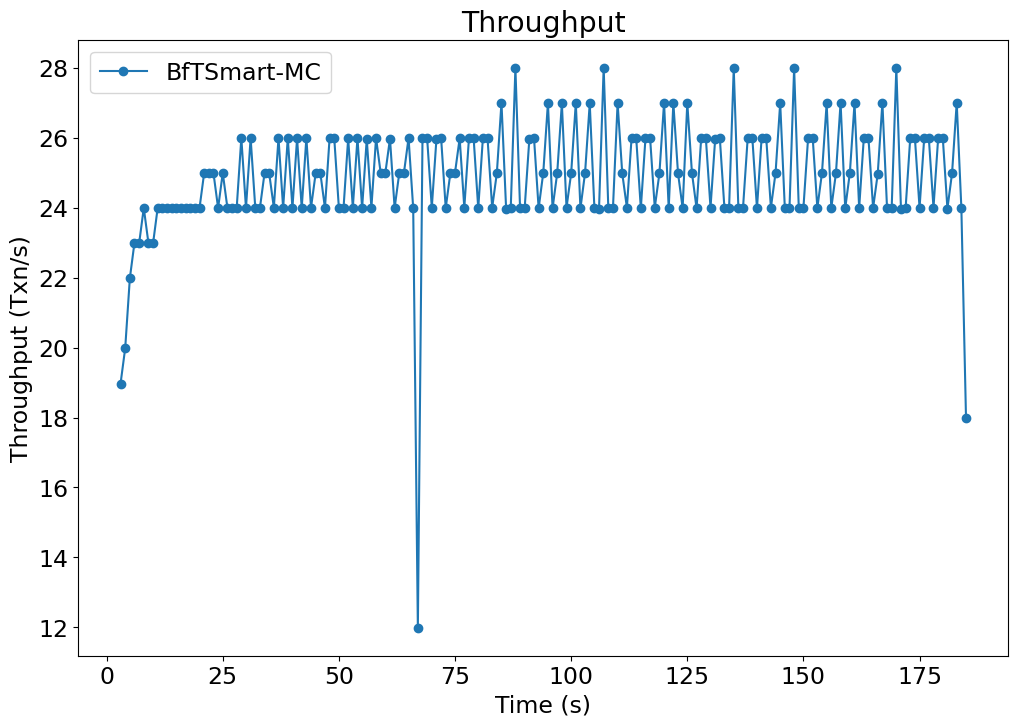

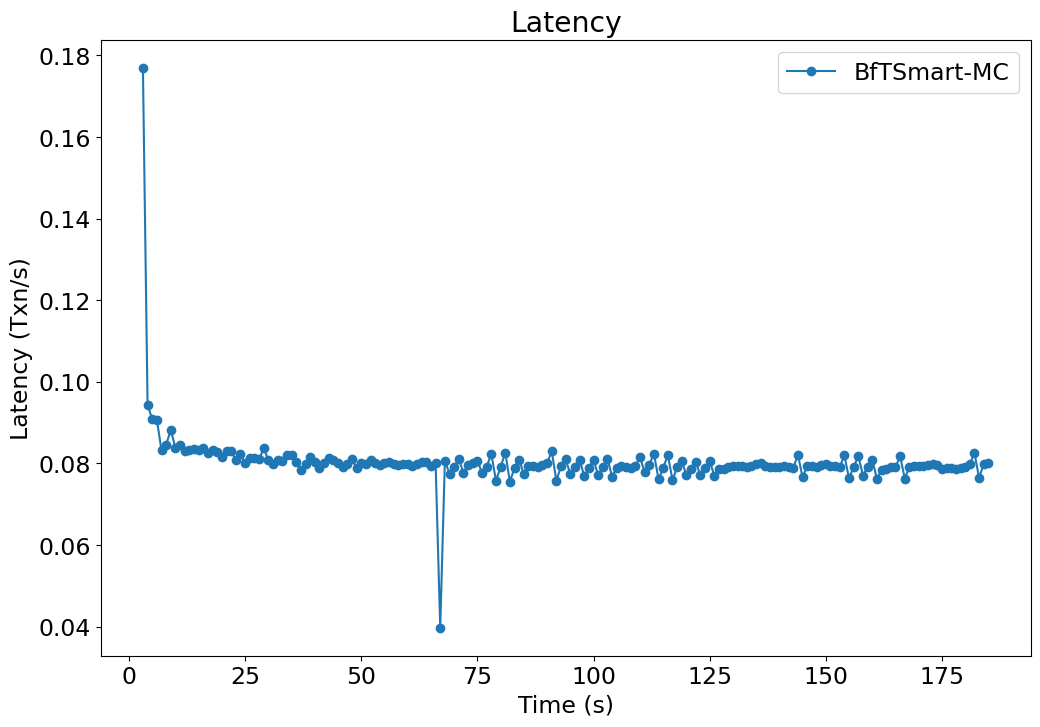

In [65]:
data2 = []
with open(PIK, "rb") as f:
    data2 =  pickle.load(f)


dict1 = data2[0]
dict2 = data2[1]



times1 = np.array(list(dict1.keys()))
thputs = np.array(list(dict1.values()))

times2 = np.array(list(dict2.keys()))
lats = np.array(list(dict2.values()))

times1

import pylab as pl

pl.figure(figsize = (12,8))
pl.rcParams.update({'font.size': 17})
pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


pl.title(r'Throughput')


pl.xlabel('Time (s)')
pl.ylabel('Throughput (Txn/s)')
pl.legend()
pl.savefig('../Experiments/'+experiment+'/out1.png', dpi = 150)
pl.show()




pl.figure(figsize = (12,8))
pl.rcParams.update({'font.size': 17})
pl.plot(times1[:], lats[:]/ len(clientIps), '-o', label='BfTSmart-MC')


pl.title(r'Latency')


pl.xlabel('Time (s)')
pl.ylabel('Latency (Txn/s)')
pl.legend()
pl.savefig('../Experiments/'+experiment+'/out2.png', dpi = 150)
pl.show()

In [66]:
times1, lats

(array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
         14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
         25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
         47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,
         58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
         69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
         80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
         91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
        102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
        113., 114., 115., 116., 117., 118., 119., 120., 121., 122., 123.,
        124., 125., 126., 127., 128., 129., 130., 131., 132., 133., 134.,
        135., 136., 137., 138., 139., 140., 141., 142., 143., 144., 145.,
        146., 147., 148., 149., 150., 

In [67]:
lats, np.average(lats[-85:-5])/len(clientIps)

(array([0.35389961, 0.1886711 , 0.1817016 , 0.18134385, 0.16640501,
        0.16925834, 0.17640367, 0.16760638, 0.16917958, 0.16604909,
        0.16649567, 0.1668745 , 0.16660758, 0.16754766, 0.1651445 ,
        0.1665015 , 0.16539991, 0.16335492, 0.16599617, 0.16607255,
        0.16165632, 0.16447941, 0.1601614 , 0.16281733, 0.16248675,
        0.16196367, 0.16735754, 0.16171959, 0.15956115, 0.16143459,
        0.16104933, 0.16416285, 0.164079  , 0.16079691, 0.15700662,
        0.15992392, 0.16291431, 0.1606965 , 0.15798547, 0.16041966,
        0.16251923, 0.16188008, 0.16042146, 0.1584088 , 0.15972158,
        0.16230915, 0.15766969, 0.16016184, 0.15992134, 0.1616773 ,
        0.160378  , 0.15933916, 0.1599695 , 0.16060892, 0.15952892,
        0.15923607, 0.15973029, 0.15970638, 0.15873307, 0.15985191,
        0.16058652, 0.16067673, 0.15886192, 0.160188  , 0.07948592,
        0.16126002, 0.154934  , 0.15836425, 0.16236554, 0.15515031,
        0.15936225, 0.16024265, 0.16130537, 0.15

In [68]:
np.sum(thputs),  np.average(thputs[-85:-5])

(4544.919999999999, 25.27625)

In [69]:
thputs

array([18.97, 19.98, 21.98, 23.  , 22.98, 23.99, 22.99, 22.98, 24.  ,
       23.98, 24.  , 23.98, 24.  , 23.99, 23.98, 23.99, 23.99, 23.99,
       24.99, 24.99, 24.99, 23.99, 24.99, 24.  , 23.98, 23.99, 25.99,
       23.99, 25.99, 24.  , 23.99, 24.99, 24.98, 24.  , 25.99, 23.99,
       25.99, 23.99, 25.98, 23.99, 25.99, 24.  , 24.98, 25.  , 23.99,
       25.99, 25.99, 23.99, 23.99, 25.98, 24.  , 25.99, 23.99, 25.96,
       24.  , 25.99, 24.99, 24.99, 25.97, 23.99, 24.99, 24.99, 25.99,
       23.98, 11.99, 26.  , 25.98, 24.  , 25.96, 26.  , 23.99, 24.99,
       25.  , 25.98, 24.  , 25.98, 26.  , 23.98, 25.99, 25.98, 24.  ,
       24.98, 27.  , 23.97, 24.  , 27.99, 23.99, 24.  , 25.96, 26.  ,
       23.98, 25.  , 26.99, 23.98, 24.99, 26.98, 24.  , 24.98, 26.99,
       23.98, 25.  , 26.98, 24.  , 23.97, 28.  , 23.99, 23.99, 26.99,
       24.98, 24.  , 25.98, 26.  , 23.98, 25.99, 25.98, 24.  , 24.98,
       27.  , 23.98, 26.99, 24.99, 23.99, 26.99, 25.  , 23.98, 26.  ,
       25.98, 24.  ,

In [70]:
  np.average(thputs[60:80]), np.average(lats[60:80])/nclusters, np.average(thputs[-35:-5]), np.average(lats[-35:-5])

(24.588500000000003, 0.07743175875, 25.32166666666667, 0.15818813066666665)

In [71]:
# np.average(lats[-50:]), np.average(thputs[-50:]) # (0.0542783668, 166.87759999999997)

In [72]:
np.sum((thputs[:180]))

4475.94

In [73]:
np.sum((thputs[:180]))

4475.94

In [74]:
%%notify
time.sleep(3)

<IPython.core.display.Javascript object>

In [75]:
# ## Main Job

# # os.system('git add .; git commit -m "test";git push')

# experiment = 'RemoveViewChangeBftSmartMC'


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 




# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  


# print('XXXXXXXX Started Servers XXXXXXXXXXXX')

# time.sleep(40)

# check_node(7)



# print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# time.sleep(125)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out'
#         print(command)
#         os.system(command)

# times_thputsDict = {}
# times_latsDict = {}

# for ip in clientIps[:1]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
#         times_thputsDict[times[i]] = thputs[i]
#         times_latsDict[times[i]] = lats[i]
        

# for ip in clientIps[1:]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
        
#         if times[i] in times_thputsDict.keys():
#             times_thputsDict[times[i]] += thputs[i]
            
#         if times[i] in times_latsDict.keys():
#             times_latsDict[times[i]] += lats[i]
    

# PIK = '../Experiments/'+experiment+"/pickle.dat"

# data = [times_thputsDict, times_latsDict]

# with open(PIK, "wb") as f:
#     pickle.dump(data, f)


# data2 = []
# with open(PIK, "rb") as f:
#     data2 =  pickle.load(f)


# dict1 = data2[0]
# dict2 = data2[1]



# times1 = np.array(list(dict1.keys()))
# thputs = np.array(list(dict1.values()))

# times2 = np.array(list(dict2.keys()))
# lats = np.array(list(dict2.values()))

# times1


# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Remote View Change for BftSmart-MC with timeout = 20 s')


# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/'+experiment+'/out.png', dpi = 150)
# pl.show()

In [76]:
# ## Main Job

# # os.system('git add .; git commit -m "test";git push')

# experiment = 'NonLeaderFailure'


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 




# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  


# print('XXXXXXXX Started Servers XXXXXXXXXXXX')

# time.sleep(40)

# check_node(7)



# print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# time.sleep(85)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in [3])
# time.sleep(45)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out'
#         print(command)
#         os.system(command)

# times_thputsDict = {}
# times_latsDict = {}

# for ip in clientIps[:1]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
#         times_thputsDict[times[i]] = thputs[i]
#         times_latsDict[times[i]] = lats[i]
        

# for ip in clientIps[1:]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
        
#         if times[i] in times_thputsDict.keys():
#             times_thputsDict[times[i]] += thputs[i]
            
#         if times[i] in times_latsDict.keys():
#             times_latsDict[times[i]] += lats[i]
    

# PIK = '../Experiments/'+experiment+"/pickle.dat"

# data = [times_thputsDict, times_latsDict]

# with open(PIK, "wb") as f:
#     pickle.dump(data, f)


# data2 = []
# with open(PIK, "rb") as f:
#     data2 =  pickle.load(f)


# dict1 = data2[0]
# dict2 = data2[1]



# times1 = np.array(list(dict1.keys()))
# thputs = np.array(list(dict1.values()))

# times2 = np.array(list(dict2.keys()))
# lats = np.array(list(dict2.values()))

# times1

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput')


# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/'+experiment+'/out.png', dpi = 150)
# pl.show()

In [77]:
# experiment = 'NonLeaderFailure'

# PIK = '../Experiments/'+experiment+"/pickle.dat"

# data2 = []
# with open(PIK, "rb") as f:
#     data2 =  pickle.load(f)


# dict1 = data2[0]
# dict2 = data2[1]



# times1 = np.array(list(dict1.keys()))
# thputs = np.array(list(dict1.values()))

# times2 = np.array(list(dict2.keys()))
# lats = np.array(list(dict2.values()))

# times1

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')
# pl.axvline(x=85.48, ls='--', color = 'red')

# pl.title(r'Throughput')


# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/'+experiment+'/out.png', dpi = 150)
# pl.show()

In [78]:
# ## Main Job

# # os.system('git add .; git commit -m "test";git push')

# experiment = 'LeaderFailure'


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 




# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  


# print('XXXXXXXX Started Servers XXXXXXXXXXXX')

# time.sleep(40)

# check_node(7)



# print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# time.sleep(85)

# # results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in [0])
# time.sleep(100)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out'
#         print(command)
#         os.system(command)

# times_thputsDict = {}
# times_latsDict = {}

# for ip in clientIps[:1]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
#         times_thputsDict[times[i]] = thputs[i]
#         times_latsDict[times[i]] = lats[i]
        

# for ip in clientIps[1:]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
        
#         if times[i] in times_thputsDict.keys():
#             times_thputsDict[times[i]] += thputs[i]
            
#         if times[i] in times_latsDict.keys():
#             times_latsDict[times[i]] += lats[i]
    

# PIK = '../Experiments/'+experiment+"/pickle.dat"

# data = [times_thputsDict, times_latsDict]

# with open(PIK, "wb") as f:
#     pickle.dump(data, f)


# data2 = []
# with open(PIK, "rb") as f:
#     data2 =  pickle.load(f)


# dict1 = data2[0]
# dict2 = data2[1]



# times1 = np.array(list(dict1.keys()))
# thputs = np.array(list(dict1.values()))

# times2 = np.array(list(dict2.keys()))
# lats = np.array(list(dict2.values()))

# times1

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput')


# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/'+experiment+'/out.png', dpi = 150)
# pl.show()

In [79]:

# def join_node1(i):
#     ip = lines[i]
#     if ip!='None':
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 8 172.31.24.233 11080 11081 config0 >../nohup_j1.out 2>&1 &"'
        
        
#         os.system(command)   
        
        
# def join_node2(i):
#     ip = lines[i]
#     if ip!='None':
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 9 172.31.19.58 11090 11091 config0 >../nohup_j2.out 2>&1 &"'
        
        
#         os.system(command)
        
        
# def join_node3(i):
#     ip = lines[i]
#     if ip!='None':
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 10 172.31.29.208 11100 11101 config0 >../nohup_j1.out 2>&1 &"'
        
        
#         os.system(command)   
        
        
# def join_node4(i):
#     ip = lines[i]
#     if ip!='None':
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 11 172.31.25.228 11110 11111 1 config1 >../nohup_j2.out 2>&1 &"'
        
        
#         os.system(command)           

# # join_node1(11), join_node2(11)

# # time.sleep(30)
# # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# # time.sleep(45)
# # print(results)  

# # time.sleep(45)
# # join_node1(11)
# # time.sleep(45)

# # join_node1(11)
# # time.sleep(45)



# print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# time.sleep(85)



# # join_node1(11)
# # time.sleep(85)


# # join_node2(11)
# # time.sleep(85)




# # results = Parallel(n_jobs=len(lines))(delayed(kill_clients)(i) for i in range(len(lines)))
# # time.sleep(25)



# # print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# # time.sleep(20)


# # def join_node1_check(i):
# #     ip = lines[i]
# #     if ip!='None':
        
# #         current = (ip.split('.'))
# #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 8 172.31.24.46 11080 11081 config0 >../nohup_j1.out 2>&1 &"'
        
        
# #         print(command)   
        

# # join_node1_check(11)


# # results = Parallel(n_jobs=len(lines))(delayed(kill_clients)(i) for i in range(len(lines)))
# # time.sleep(5)


# # join_node2(11)
# # time.sleep(45)


# # print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# # time.sleep(45)




# # join_node2(11)
# # time.sleep(45)




# # join_node3(13)
# # time.sleep(40)
# # join_node4(13)
# # time.sleep(40)

# # time.sleep(50)
# check_node(10)

# # time.sleep(100)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'
#         print(command)
#         os.system(command)
        
        
        
# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'
#         print(command)
#         os.system(command)
        
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_j1.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_j1.out'
#         print(command)
#         os.system(command)
        
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_j2.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_j2.out'
#         print(command)
#         os.system(command)        

# ## Byzantine Remote View Change

# times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_c4_11.out')

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput with Byzantine Remote View Change ($nz$=8)')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()


# ## Join End for Checking

# times_all_clients = []
# ops_all_clients = []
# thputs_all_clients = []
# latencies_all_clients = []


# for ip in clientIps:
#     print(lines.index(ip), nreplicas)
    
    
#     with open('../Experiments/'+experiment+'/'+'nohup_c'+str(nreplicas)+'_'+str(lines.index(ip))+'.out') as f:
#         data = f.readlines()
        
    
    

#     times = []
#     ops = []
#     thputs = []
#     latencies = []



#     for line in data:
#         if 'current ops/sec' in line:
#     #         print(line)

#             numbers_string = line.replace('sec:', ':').replace('operations;', ':').replace(\
#                     'current ops/sec; [UPDATE AverageLatency(us)=', ':').replace('] \n', '').replace(' ','')

        
#             if len(numbers_string.split(':')) == 4:

#                 times.append(float(numbers_string.split(':')[0]))
#                 ops.append(float(numbers_string.split(':')[1]))    
#                 thputs.append(float(numbers_string.split(':')[2]))    
#                 latencies.append(float(numbers_string.split(':')[3])/1e6)    



#     times = np.array(times)
#     ops = np.array(ops)
#     thputs = np.array(thputs)
#     latencies = np.array(latencies)
    
#     times_all_clients.append(times)
#     ops_all_clients.append(ops)    
#     thputs_all_clients.append(thputs)    
#     latencies_all_clients.append(latencies)    

# times_all_clients


# times_all_clients_final = []
# ops_all_clients_final = []
# thputs_all_clients_final = []
# latencies_all_clients_final = []

# for iter_, item in enumerate(times_all_clients):
    

#     np.array(list(set(item).intersection(*times_all_clients[:])))
#     # index = in1d(times_all_clients[0],a1)
#     # result = a2[index]

#     both = set(item).intersection(np.array(list(set(item).intersection(*times_all_clients[:]))))

#     indices_A = [list(item).index(x) for x in list(both)]
#     indices_B = [list(set(item).intersection(*times_all_clients[:])).index(x) for x in both]

#     times_all_clients_final.append(item[indices_A])
#     ops_all_clients_final.append(ops_all_clients[iter_][indices_A])
#     thputs_all_clients_final.append(thputs_all_clients[iter_][indices_A])    
#     latencies_all_clients_final.append(latencies_all_clients[iter_][indices_A])    

# times_all = times_all_clients_final[0]
# ops_all = sum(ops_all_clients_final)
# thputs_all = sum(thputs_all_clients_final)
# latencies_all = sum(latencies_all_clients_final)/len(latencies_all_clients_final)


# print('Average Throughput is ',(ops_all[-1] - ops_all[59])/(times_all[-1] - times_all[59]))

# print('Average Latency is', np.average(latencies_all[60:-10]))

# times_all, thputs_all

# # 40 client threads 2 delivery:93+95/81
# # 100 client threads 2 delivery:124+129/81
# # 100 client threads 8 delivery:138+138/81
# # 40 client threads 8 delivery:95+95/81
# # 40 client threads 16 delivery:97+96/81
# # 40 client threads 16 delivery without IO:93+93/81
# # 100 client threads 16 delivery without IO:146+149/81




# (146+149)/81

# check_node(0)

# for i in [0,1, 4, 14, 15]:
# # for i in [1]:
    
#     ip = lines[i]
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../nohup_c4_'+str(i)+'.out'


#         os.system(command)

# ## Join Experiment

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))



# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))



# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 



# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# # print(results)  

# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  



# # time.sleep(30)
# # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# # print(results)  


# # time.sleep(80)
# # results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# # for i in [0,1,4,8,12,13,14]:
# # # for i in [1]:
    
# #     ip = lines[i]
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../nohup'+str(i)+'.out'


# #         os.system(command)

# check_node(11)

# portStart = 11000 + len(nodeIps)*10

# join_lines = []
# currentPort = portStart

# for i in range(len(no_cluster_yet_nodes)):
#     line = str(len(nodeIps)+i) + ' ' + no_cluster_yet_nodes[i] + ' ' + str(currentPort) + ' '+ str(currentPort+1)
#     currentPort = currentPort + 10
#     join_lines.append(line)
#     print('server',line)

# ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 8 172.31.31.236 11080 11081 config0
# ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 9 172.31.23.57 11090 11091 config1

# ## KILL ALL JAVA



# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))
# print(results)  

# ## JOIN COMMAND





# def run_join_client(i):
    
    
    
#     ip = lines[-2]
#     if ip!='None':
#         current = (ip.split('.'))
        
#         join_commands = join_command(i)
        
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com "cd bftsmarto; '+join_commands+'"'
        
#         print(command)
#         os.system(command)

# ## JOIN EXPERIMENT

# check_node(3)

# # t1 = time.time()
# # time.sleep(3)
# # t2 = time.time()

# import time
# JoinTimes = []


# t_start = time.time()

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# print(results)  

# check_node(9)

# time.sleep(40)

# for i in range(4,8):
#     print(i)
#     JoinTimes.append(time.time() - t_start)
#     run_join_client(i)
#     time.sleep(40)
    

# check_node(7)


# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))
# print(results)  

# ip

# ip = lines[-1]
# if ip!='None':
#     current = (ip.split('.'))
#     command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#           +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out data/MultipleJoins/nohup.out'


#     os.system(command)




# import numpy as np
# import pylab as pl

# times ,thputs, lats = getTimesThputs('data/MultipleJoins/nohup.out')

# JoinTimes

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:-10], thputs[:-10], '-o', label='Existing nodes')


# pl.title(r'Throughput with multiple join requests for Bft-Smart ($nz$=4)')

# pl.axvline(JoinTimes[0], label = '1st join', ls = '--', color = 'r')
# pl.axvline(JoinTimes[1], label = '2nd join', ls = '--', color = 'g')
# pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('StatsPaper/fig10.png', dpi = 150)
# pl.show()
# pl.clf()



# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:-10], lats[:-10], '-o', label='Existing nodes')


# pl.title(r'Latency with multiple join requests for Bft-Smart ($nz$=4)')

# # pl.axvline(JoinTimes[0], label = '1st join', ls = '--', color = 'r')
# # pl.axvline(JoinTimes[1], label = '2nd join', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# # pl.ylabel(r'Latency ($\mu$s)')
# pl.legend()
# # pl.savefig('StatsPaper/fig10.png', dpi = 150)
# pl.show()
# pl.clf()

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:-10], thputs[:-10]*lats[:-10], '-o', label='Existing nodes')


# pl.title(r'Latency*thput with multiple join requests for Bft-Smart ($nz$=4)')

# # pl.axvline(JoinTimes[0], label = '1st join', ls = '--', color = 'r')
# # pl.axvline(JoinTimes[1], label = '2nd join', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel(r'Latency ($\mu$s)')
# pl.legend()
# # pl.savefig('StatsPaper/fig10.png', dpi = 150)
# pl.show()
# pl.clf()

# ## Random Failure

# os.system('git add .; git commit -m "Fixed Failures and Joins";git push')

# experiment = 'bjoin'


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))


# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 




# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# # print(results)  

# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  


# print('XXXXXXXX Started Servers XXXXXXXXXXXX')

# time.sleep(40)

# check_node(7)



# def fail_node(i):
#     ip = lines[i]
#     if ip!='None' and ip in nodeIps:
#         current = (ip.split('.'))
                
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com "cd bftsmartt; sudo killall java"'
        
#         print(command)
#         os.system(command)

# import numpy as np
# import random

# import time
# # time.sleep(10)

# FailTimes = []


# t_start = time.time()

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# print(results)  

# check_node(9)

# time.sleep(45)

# for i in random.sample(list(np.arange(1)), 1):
#     print(i)
#     FailTimes.append(time.time() - t_start)
#     fail_node(0)
#     time.sleep(85)
    

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# ip = lines[-1]
# if ip!='None':
#     current = (ip.split('.'))
#     command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#           +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/nohup.out'

#     print(command)
#     os.system(command)

# FailTimes

# times ,thputs, lats = getTimesThputs('../Experiments/nohup.out')

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput with single leader failure ($nz$=8)')

# pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/fig6_leader.png', dpi = 150)
# pl.show()
# pl.clf()


# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'
#         print(command)
#         os.system(command)
        
        
        
# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'
#         print(command)
#         os.system(command)
        
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_j1.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_j1.out'
#         print(command)
#         os.system(command)
        
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_j2.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_j2.out'
#         print(command)
#         os.system(command)        

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))